In [1]:
import numpy as np
from datascience import *

# Configure notebook (happens automatically on data8.berkeley.edu)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

In [2]:
trips = Table.read_table('trip.csv')

In [3]:
thirty_seconds = np.arange(60, 1801, 30)
thirty_seconds

array([  60,   90,  120, ..., 1740, 1770, 1800])

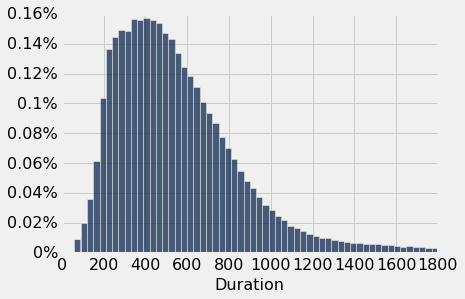

In [4]:
commute = trips.where(trips.column('Duration') < 1800)
commute.hist('Duration', bins=thirty_seconds)

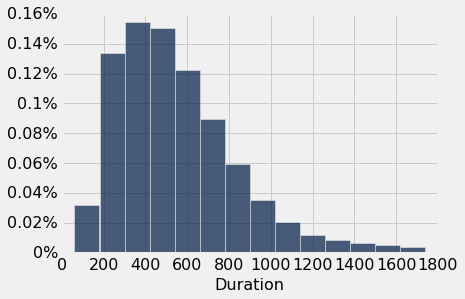

In [5]:
commute.hist('Duration', bins=np.arange(60, 1801, 120))

In [6]:
top = Table.read_table('top_movies.csv')
top.set_format([2, 3], NumberFormatter)

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),"906,723,418","906,723,400",2015
Avatar,Fox,"760,507,625","846,120,800",2009
Titanic,Paramount,"658,672,302","1,178,627,900",1997
Jurassic World,Universal,"652,270,625","687,728,000",2015
Marvel's The Avengers,Buena Vista (Disney),"623,357,910","668,866,600",2012
The Dark Knight,Warner Bros.,"534,858,444","647,761,600",2008
Star Wars: Episode I - The Phantom Menace,Fox,"474,544,677","785,715,000",1999
Star Wars,Fox,"460,998,007","1,549,640,500",1977
Avengers: Age of Ultron,Buena Vista (Disney),"459,005,868","465,684,200",2015
The Dark Knight Rises,Warner Bros.,"448,139,099","500,961,700",2012


In [7]:
top.take([3, 18, 100]) 

Title,Studio,Gross,Gross (Adjusted),Year
Jurassic World,Universal,"652,270,625","687,728,000",2015
Spider-Man,Sony,"403,706,375","604,517,300",2002
Gone with the Wind,MGM,"198,676,459","1,757,788,200",1939


In [8]:
top.take(np.arange(0, top.num_rows, 40))

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),"906,723,418","906,723,400",2015
Shrek the Third,Paramount/Dreamworks,"322,719,944","408,090,600",2007
Bruce Almighty,Universal,"242,829,261","350,350,700",2003
Three Men and a Baby,Buena Vista (Disney),"167,780,960","362,822,900",1987
Saturday Night Fever,Paramount,"94,213,184","353,261,200",1977


In [9]:
np.random.randint(3, 8)  # select once at random from 3, 4, 5, 6, 7

5

In [10]:
start = np.random.randint(0, 10)
top.take(np.arange(start, top.num_rows, 10))

Title,Studio,Gross,Gross (Adjusted),Year
Marvel's The Avengers,Buena Vista (Disney),"623,357,910","668,866,600",2012
The Lion King,Buena Vista (Disney),"422,783,777","775,573,900",1994
Star Wars: Episode III - Revenge of the Sith,Fox,"380,270,577","516,123,900",2005
The Hunger Games: Mockingjay - Part 1,Lionsgate,"337,135,885","354,324,000",2014
Indiana Jones and the Kingdom of the Crystal Skull,Paramount,"317,101,119","384,231,200",2008
Harry Potter and the Half-Blood Prince,Warner Bros.,"301,959,197","352,098,800",2009
Home Alone,Fox,"285,761,243","589,287,500",1990
Night at the Museum,Fox,"250,863,268","322,261,900",2006
Beverly Hills Cop,Paramount,"234,760,478","584,205,200",1984
Saving Private Ryan,Dreamworks,"216,540,909","397,999,500",1998


In [11]:
die = Table().with_column('Face', [1, 2, 3, 4, 5, 6])
die

Face
1
2
3
4
5
6


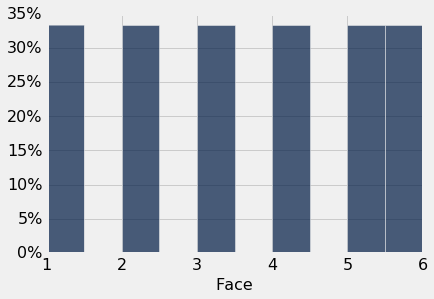

In [12]:
die.hist()

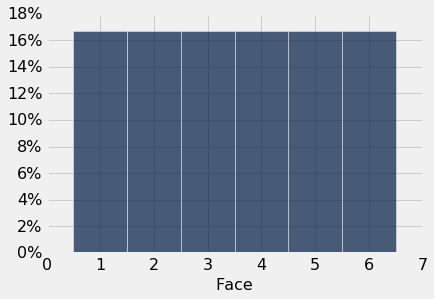

In [13]:
die.hist(bins=np.arange(0.5, 7, 1), overlay=False)

In [14]:
die.sample(10, with_replacement=True)

Face
5
5
3
5
1
2
2
1
1
3


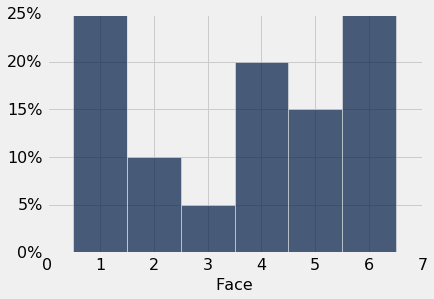

In [15]:
def dice_hist(n):
    rolls = die.sample(n, with_replacement=True)
    rolls.hist(bins=np.arange(0.5, 7, 1))
    
dice_hist(20)

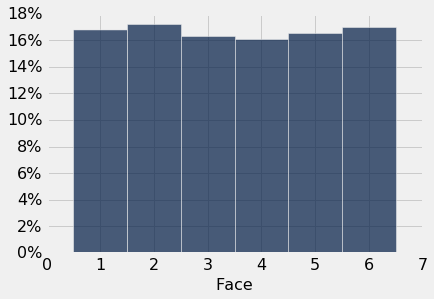

In [16]:
dice_hist(10000)

In [17]:
from itertools import product

ranks = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
suits = ['♠︎', '♥︎', '♦︎', '♣︎']
cards = product(ranks, suits)

deck = Table(['rank', 'suit']).with_rows(cards)
deck

rank,suit
A,♠︎
A,♥︎
A,♦︎
A,♣︎
2,♠︎
2,♥︎
2,♦︎
2,♣︎
3,♠︎
3,♥︎


In [18]:
deck.sample(5)

rank,suit
7,♠︎
K,♦︎
9,♥︎
A,♥︎
6,♠︎


In [19]:
for i in np.arange(5):
    print(i)

0
1
2
3
4


In [20]:
t = Table(['Rank', 'Suit'])
for i in np.arange(100):
    card = deck.row(np.random.randint(52))
    if card.item(0) == 'A':
        t.append(card)
t

Rank,Suit
A,♠︎
A,♣︎
A,♦︎
A,♠︎
A,♠︎
A,♠︎
A,♦︎
A,♣︎


In [21]:
hands = Table(['Pair', 'Three-of-a-kind', 'Four-of-a-kind', 'Flush'])
for i in np.arange(10000):
    hand = deck.sample(5)
    max_same = max(hand.group('rank').column('count'))
    is_flush = hand.group('suit').num_rows == 1
    hands.append([max_same >= 2, max_same >= 3, max_same >= 4, is_flush])
hands

Pair,Three-of-a-kind,Four-of-a-kind,Flush
False,False,False,False
False,False,False,False
True,False,False,False
True,False,False,False
True,False,False,False
True,False,False,False
False,False,False,False
False,False,False,False
False,False,False,False
True,False,False,False


In [22]:
for label in hands.labels:
    success = np.count_nonzero(hands.column(label))
    print('A', label, 'was drawn', success, 'of', hands.num_rows, 'times')

A Pair was drawn 4990 of 10000 times
A Three-of-a-kind was drawn 229 of 10000 times
A Four-of-a-kind was drawn 4 of 10000 times
A Flush was drawn 19 of 10000 times


In [23]:
def roll_once():
    return np.random.randint(1, 7)

In [24]:
def respond(true_answer):
    if roll_once() >= 5:
        return not true_answer
    else:
        return true_answer

In [25]:
respond(False)

False

In [26]:
responses = Table(['Truth', 'Response'])
for i in np.arange(1000):
    responses.append([False, respond(False)])

responses

Truth,Response
False,False
False,False
False,False
False,False
False,True
False,False
False,False
False,False
False,False
False,False


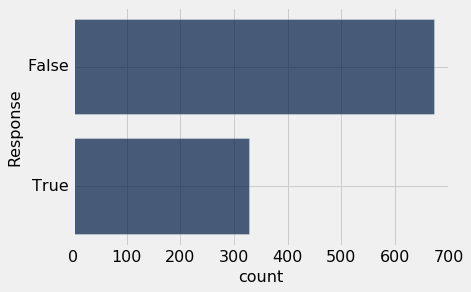

In [27]:
responses.group('Response').barh('Response')